In [1]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
import sys
from d2lzh_pytorch import *
#import os
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
#conda install nomkl

In [2]:
num_inputs=2
num_examples=1000
true_w=[2,-3.4]
true_b=4.2
features=torch.randn(num_examples,num_inputs,dtype=torch.float32)
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),
                       dtype=torch.float32)


In [3]:
print(features[0],labels[0])

tensor([1.2313, 1.0602]) tensor(3.0602)


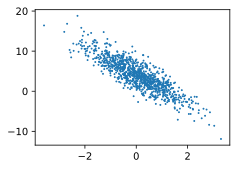

In [4]:
def use_svg_display():
    #用矢量图表示
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
    
    use_svg_display()
    plt.rcParams['figure.figsize']=figsize
    
set_figsize(figsize=(3.5,2.5))
plt.scatter(features[:,1].numpy(),labels.numpy(),1);


In [5]:
batch_size=10
for X,y in data_iter(batch_size, features, labels):
    print(X,y)
    break

tensor([[ 0.4220,  1.3365],
        [ 0.6064,  1.9037],
        [-1.7685,  1.5942],
        [-0.5500, -0.6261],
        [-0.5893,  0.4296],
        [ 0.1624, -1.2432],
        [-0.6276, -0.3222],
        [ 0.2729,  1.1398],
        [-0.2523,  0.2551],
        [ 0.2517,  0.8444]]) tensor([ 0.5060, -1.0480, -4.7470,  5.2335,  1.5569,  8.7603,  4.0199,  0.8746,
         2.8350,  1.8380])


In [6]:
w=torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.float32)
b=torch.zeros(1,dtype=torch.float32)

In [7]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True) 

tensor([0.], requires_grad=True)

In [8]:
def linreg(X, w, b):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    return torch.mm(X, w) + b

In [9]:
def squared_loss(y_hat, y):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [10]:
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

In [11]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数

        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.049263
epoch 2, loss 0.000210
epoch 3, loss 0.000051


In [12]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9991],
        [-3.3997]], requires_grad=True)
4.2 
 tensor([4.1997], requires_grad=True)


In [ ]:
lssvm ,拟合模型分析，